**Relevant reading for this problem set**:
<a href="https://moderndive.com/10-inference-for-regression.html"
target="_blank">ModernDive Chapter 10: Inference for Regression</a>.

## Background

For this problem set you will apply statistical inference to a linear
modeling and explore methods to check the required conditions. To start
we will build a model using data from the `palmerpenguins` package. The
`penguins` data contains size measurements for three penguin species
observed on three islands in the Palmer Archipelago, Antarctica.

First we will start with our typical exploratory data analysis and then
build our linear model. From there we will use our new skills to make
inferences about our regression model and check the necessary
conditions.

### Load packages

We will read the data in from the`palmerpenguins` package, explore the
data using the `dplyr` package and visualize it using the `ggplot2`
package. The `moderndive` package includes some nice functions to show
regression model outputs and finally use the `infer` package for “tidy”
and transparent statistical inference.

In [1]:
library('moderndive')
library('infer')
library('palmerpenguins')
library('tidymodels')

Warning message:
"package 'moderndive' was built under R version 4.5.1"
Warning message:
"package 'palmerpenguins' was built under R version 4.5.1"

Attaching package: 'palmerpenguins'


The following objects are masked from 'package:datasets':

    penguins, penguins_raw


── Attaching packages ────────────────────────────────────── tidymodels 1.3.0 ──

✔ broom        1.0.8     ✔ rsample      1.3.0
✔ dials        1.4.0     ✔ tibble       3.2.1
✔ dplyr        1.1.4     ✔ tidyr        1.3.1
✔ ggplot2      3.5.2     ✔ tune         1.3.0
✔ modeldata    1.4.0     ✔ workflows    1.2.0
✔ parsnip      1.3.1     ✔ workflowsets 1.1.0
✔ purrr        1.0.4     ✔ yardstick    1.3.2
✔ recipes      1.2.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()



### The data

In [4]:
pen <- penguins |> 
  filter(!is.na(flipper_length_mm))

Take a moment to look at the data using `glimpse` and `head`. The dataset contains 8
variables. You can read more about the variables by placing your cursor in `penguins` and 
looking at the `Contextual Help` tool.

For our lab we will focus on four variables, the explanatory variables
include:

-   `flipper_length_mm` - an integer denoting flipper length
    (millimeters)
-   `bill_length_mm` - a number denoting bill length (millimeters)
-   `species`- denotes penguin species (Adélie, Chinstrap and Gentoo)

The outcome variable `body_mass_g` is an integer denoting body mass
(grams).

In [5]:
glimpse(pen)

Rows: 342
Columns: 7
$ species           <fct> Adelie, Adelie, Adelie, Adelie, Adelie, Adelie, Adel…
$ island            <fct> Torgersen, Torgersen, Torgersen, Torgersen, Torgerse…
$ bill_length_mm    <dbl> 39.1, 39.5, 40.3, 36.7, 39.3, 38.9, 39.2, 34.1, 42.0…
$ bill_depth_mm     <dbl> 18.7, 17.4, 18.0, 19.3, 20.6, 17.8, 19.6, 18.1, 20.2…
$ flipper_length_mm <int> 181, 186, 195, 193, 190, 181, 195, 193, 190, 186, 18…
$ body_mass_g       <int> 3750, 3800, 3250, 3450, 3650, 3625, 4675, 3475, 4250…
$ sex               <fct> male, female, female, female, male, female, male, NA…


In [6]:
head(pen)

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
Adelie,Torgersen,39.1,18.7,181,3750,male
Adelie,Torgersen,39.5,17.4,186,3800,female
Adelie,Torgersen,40.3,18.0,195,3250,female
Adelie,Torgersen,36.7,19.3,193,3450,female
Adelie,Torgersen,39.3,20.6,190,3650,male
Adelie,Torgersen,38.9,17.8,181,3625,female


### Visualization

We will start by investigating the relationship between
‘flipper_length_mm’ and ‘body_mass_g’.

`geom_smooth()` using formula = 'y ~ x'


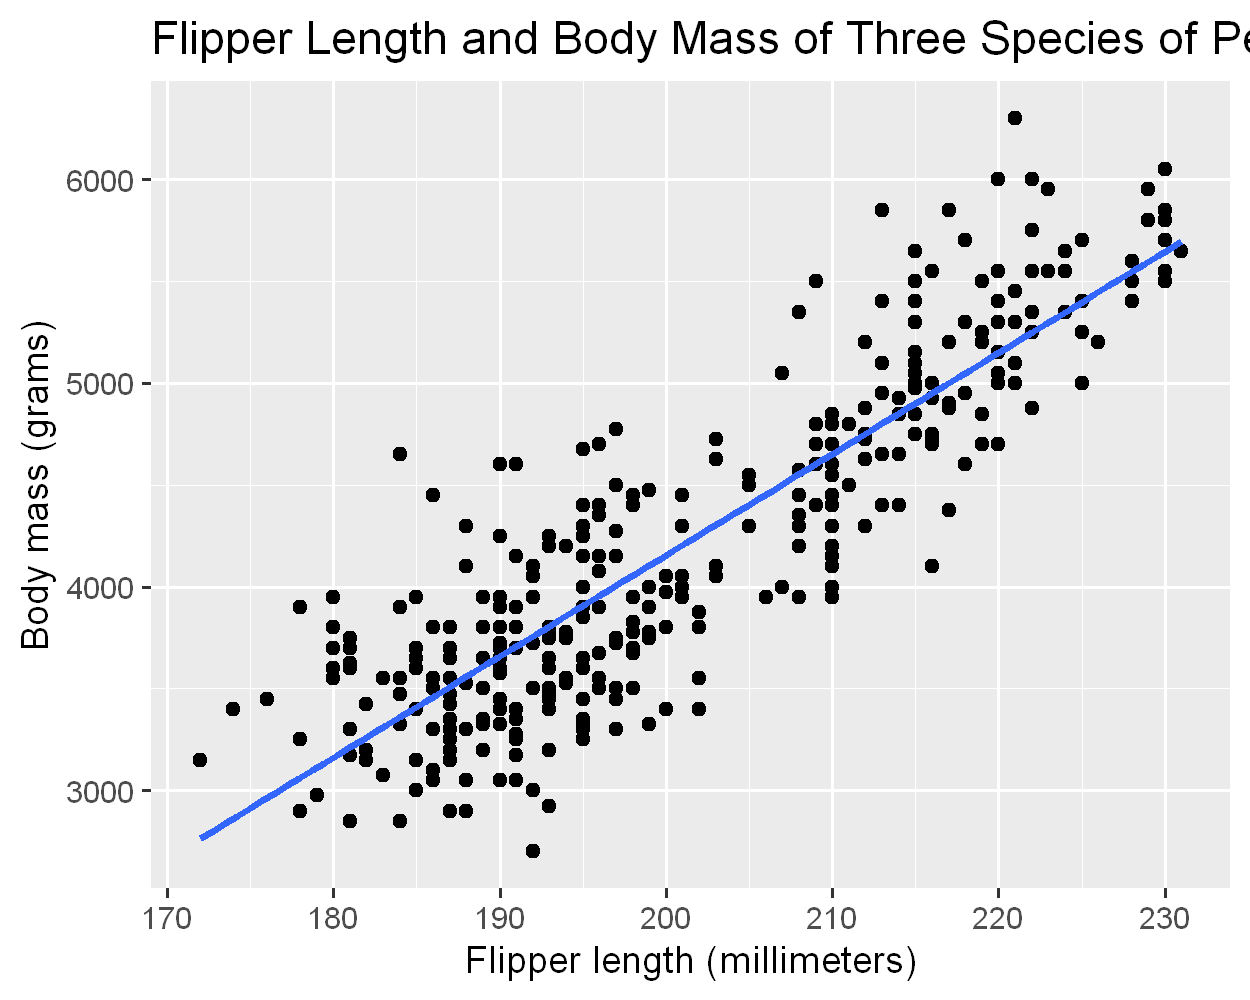

In [7]:
ggplot(data = pen, aes(y = body_mass_g, x = flipper_length_mm)) + 
  geom_point() + 
  geom_smooth(method = "lm", se = FALSE) +
  labs(x = "Flipper length (millimeters)", 
       y = "Body mass (grams)", 
       title = "Flipper Length and Body Mass of Three Species of Penguins") 

## Question 1

Does the relationship appear to be positive or negative? Does it look to
be reasonably linear?

> 📝 **Matt's Response**
> 
> The relationship looks like it's positive. As the flipper length increase,
> body mass tends to increase as well. The plot makes it look like the
> relationship is reasonably linear, but we'll need to dig a little deeper.

## Create a linear regression model

Here we use the [standard error](https://moderndive.com/10-inference-for-regression.html#regression-se) to calculate a confidence interval. Later we will use the bootstrap resampling technique
that does not rely on distrubutional assumptions.

In [ ]:
mod <- linear_reg() |> set_engine('lm')

pen_model <- mod |> fit(body_mass_g ~ flipper_length_mm, data = pen)

tidy(pen_model) |> mutate(
    lower_ci = estimate - 1.96 * std.error,
    upper_ci = estimate + 1.96 * std.error
)

term,estimate,std.error,statistic,p.value,lower_ci,upper_ci
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-5780.83136,305.814504,-18.90306,5.587301e-55,-6380.22779,-5181.43493
flipper_length_mm,49.68557,1.518404,32.72223,4.370681e-107,46.70949,52.66164


## Question 2

Using our shorthand interpretation for confidence intervals and the
regression table, write a sentence interpreting the 95% confidence
interval for $\beta_1$?

> 📝 **Matt's Response**
> 
> For an increase of 1 mm in flipper length, we're 95% confident that there is
> an associated increase in body mass of between 46.71 - 52.66 grams.

## Question 3

Recall that the test statistic and $p$-value correspond to the
hypothesis test:

$$
\begin{aligned}
  H_0: & \beta_{1} = 0 \\
  \text{vs } H_A: & \beta_{1} \neq 0
\end{aligned}
$$

Write up the results & conclusions for this hypothesis test.

> 📝 **Matt's Response**
> 
> We are testing the null hypothesis that there is no linear relationship
> between flipper length in body mass (i.e., $\beta_1 = 0$). Our alternative
> hypothesis is that there *is* a linear relationship between flipper length
> and body mass, expressed as $\beta_1 \ne 0$.
>
> Using the `linear_model` function from the `tidymodels` package, we
> calculated a t-statistic of $t = 32.72$, leading to a p-value of
> $p = 4.37 \times 10^{-107}$. For a significance level of $\alpha = 0.05$,
> we have strong evidence of a linear relationship.
>
> Thus, we can reject the null hypothesis in favor of the alternative
> hypothesis, concluding that there is a statistically significant linear
> relationship between flipper length and body mass. Put another way, flipper
> length is a strong predictor of body mass.

## Question 4

You may remember that this hypothesis test is only valid if certain
“conditions for inference for regression” are met. Let’s take a closer
look those conditions.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

### Question 4a: Linearity of relationship between variables

This was analyzed in question 1. Did you say that the
relationship between `flipper_length_mm` and `body_mass_g` appears to be
linear?

> 📝 **Matt's Response**
> 
> I had expected it to be linear.

### Independence of the residuals

The observations in our data must be independent of one another. In this
data, we can not be sure this is case, for example, some of the penguins
included may be related (siblings, parents). We are not given enough
information to verify this condition has been met.

### Normality of the residuals

The third condition is that the residuals should follow a Normal
distribution centered 0. To check for normality, create a histogram.

The code to get the residuals is given.

In [9]:
regression_points <- augment(pen_model, new_data = pen)

regression_points |> head()

.pred,.resid,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<int>,<int>,<fct>
3212.256,537.743839,Adelie,Torgersen,39.1,18.7,181,3750,male
3460.684,339.316007,Adelie,Torgersen,39.5,17.4,186,3800,female
3907.854,-657.854091,Adelie,Torgersen,40.3,18.0,195,3250,female
3808.483,-358.482958,Adelie,Torgersen,36.7,19.3,193,3450,female
3659.426,-9.426259,Adelie,Torgersen,39.3,20.6,190,3650,male
3212.256,412.743839,Adelie,Torgersen,38.9,17.8,181,3625,female


### Question 4b: Add code for the histogram.

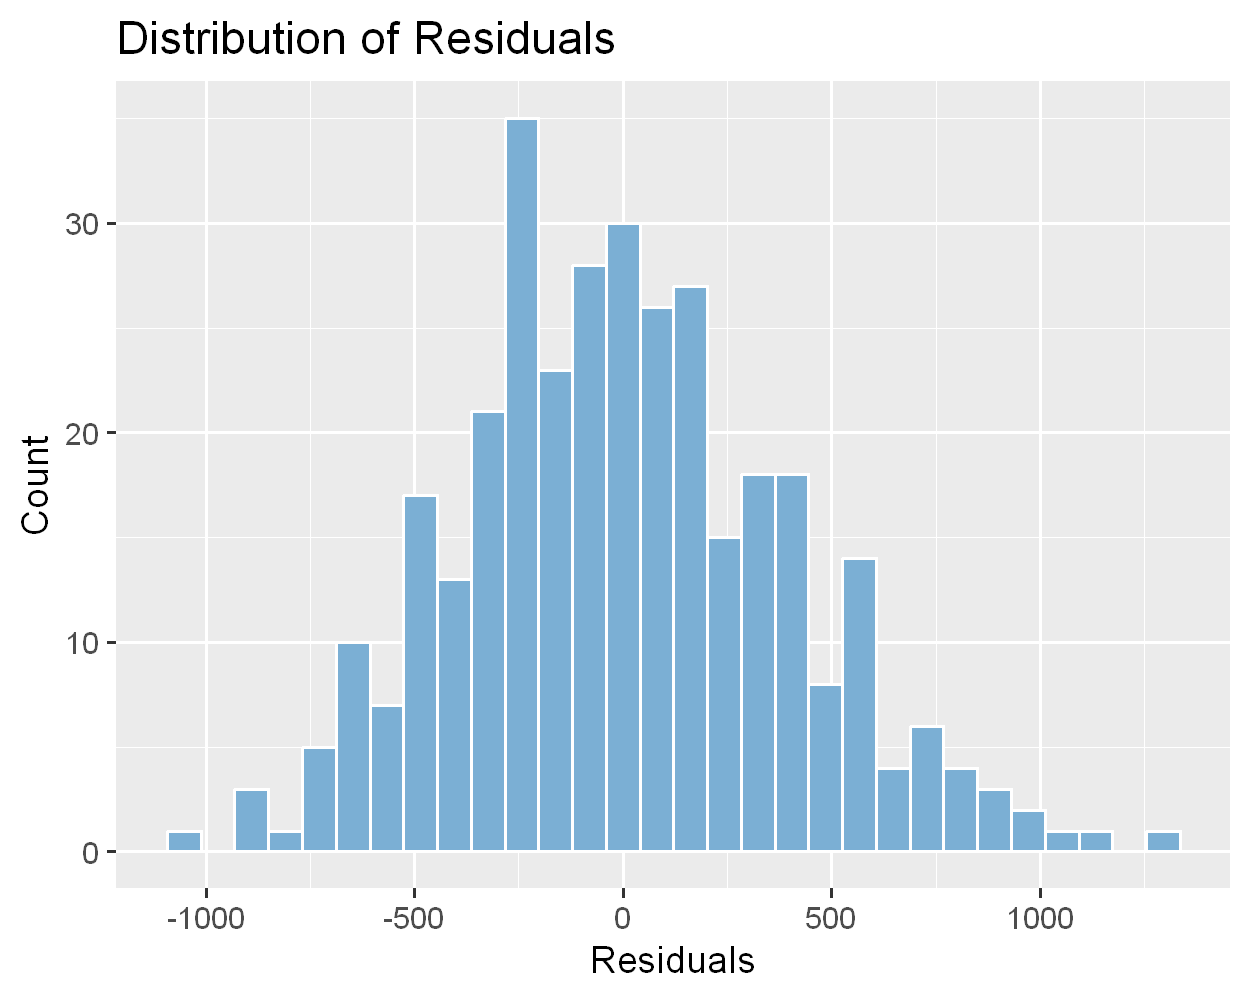

In [ ]:
carolina_blue <- "#7bafd4"
ggplot(regression_points, aes(x = .resid)) +
  geom_histogram(bins = 30, fill = carolina_blue, color = "white") +
  labs(
    title = "Distribution of Residuals",
    x = "Residuals",
    y = "Count"
  )

### Question 4c: Does this model meet the normality of residuals condition?

> 📝 **Matt's Response**
> 
> A few things I notice about the distribution of residuals:
>
> - The center is roughly at 0, perhaps slightly to the right of 0.
> - The shape is fairly symmetric, except for the spike at about -250.
> - The shape tapers off on the left and right, similar to how a bell curve is
>   shaped.
>
> With all of this in mind, it leads me to believe that the distribution of
> residuals follows a normal distribution. Because of this,
> **I'm confident that this model meets the normality of residuals condition.**

### Equality of variance of the residuals

The final condition says that the residual should exhibit equal variace
across all of the values of the explanatory variable.

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis. Does this model meet the Normality of Residuals
condition?

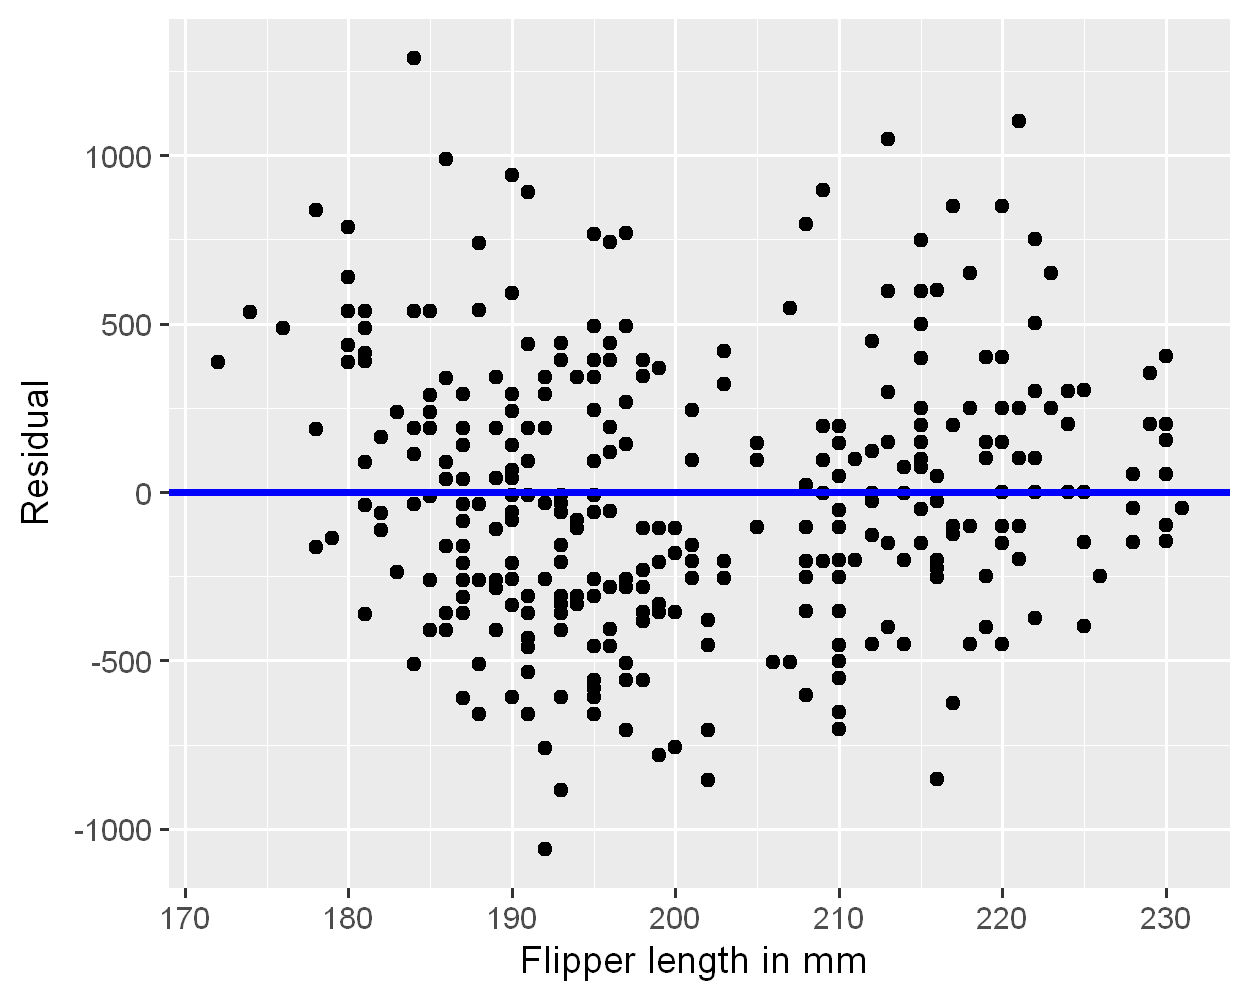

In [20]:
ggplot(regression_points, aes(x = flipper_length_mm, y = .resid)) +
  geom_point() +
  labs(x = "Flipper length in mm ", y = "Residual") +
  geom_hline(yintercept = 0, col = "blue", linewidth = 1)

### Question 4d. Does this model meet the equality of variance condition?

> 📝 **Matt's Response**
> 
> A few things to note:
>
> - The spread doesn't look consistent, but it doesn't look wildly abnormal.
> - It appears that residuals tend to be smaller at about 190-210mm in flipper
>   length, and residuals are higher outside of this range.
> - However, it does not appear that there is a strong trend or correlation
>   between flipper length and residual -- the spread of residuals appears
>   mostly constant across flipper lengths.
>
> Because there is not strong evidence that the spread of residuals is
> increasing or decreasing with flipper length, it seems reasonable to conclude
> that **the model meets the equality of variance condition.**

## Question 5

Now let’s circle back and take a second look at the confidence
intervals. Using this bootstrap distribution, we’ll construct the 95%
confidence interval using the percentile method and (if appropriate) the
standard error method as well. We can compare our results to the results
from R (which uses mathematical formula to construct confidence
intervals.)

### Step 1: Calculate the bootstrap statistic and Visualize the bootstrap distribution

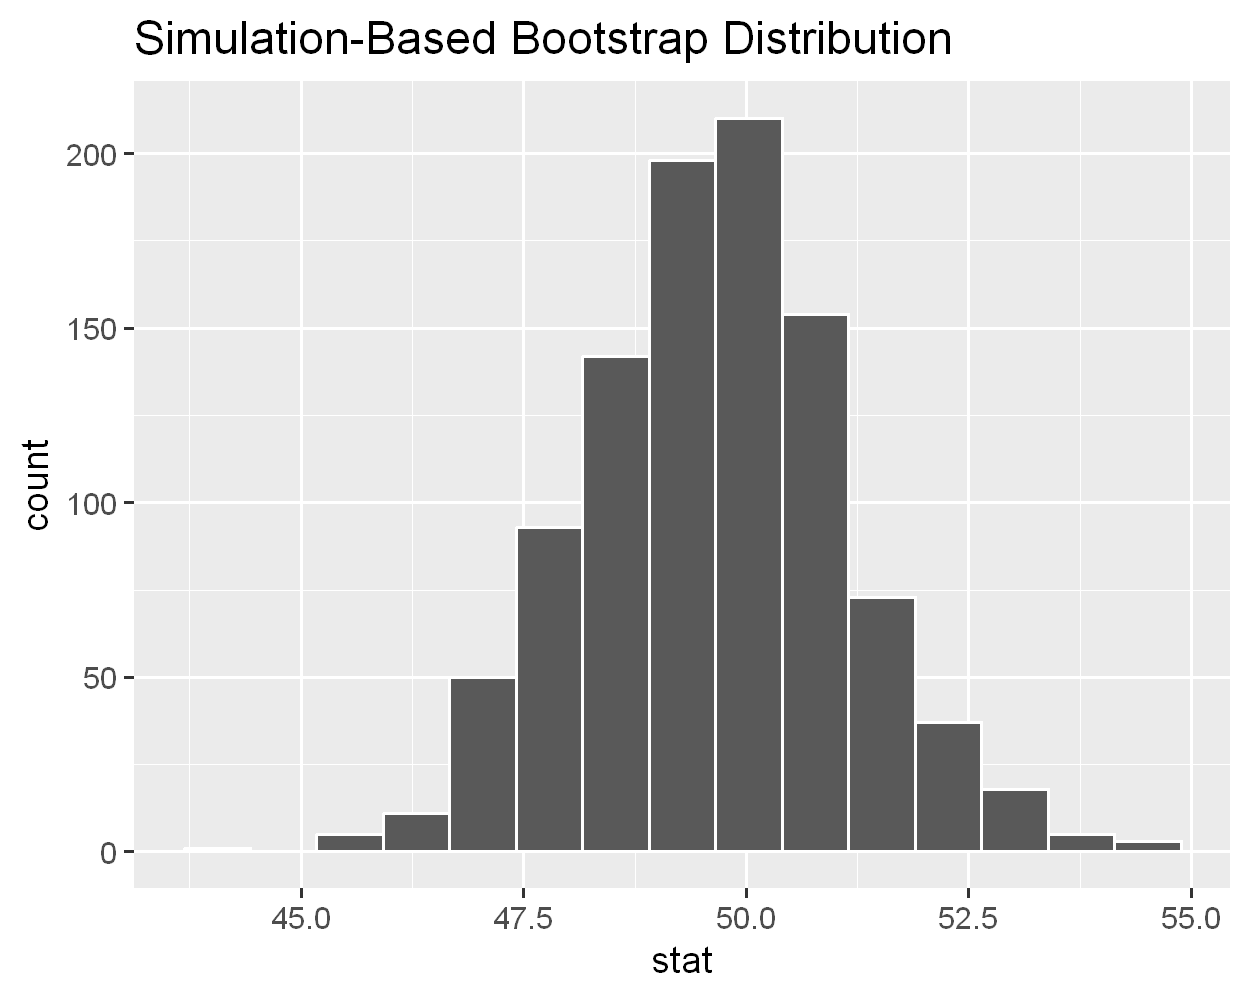

In [22]:
bootstrap_distn_slope <- pen |> 
  specify(formula = body_mass_g ~ flipper_length_mm) |>
  generate(reps = 1000, type = "bootstrap") |>
  calculate(stat = "slope")

visualize(bootstrap_distn_slope)

### Step 2: Calculate CI from the a bootstap resample using the percentile method.

Find a 95% CI using percentile method:

In [24]:
# Finish the code here:

bootstrap_distn_slope |> summarize(
    lower_ci = quantile(stat, 0.025),
    upper_ci = quantile(stat, 0.975)
)

lower_ci,upper_ci
<dbl>,<dbl>
46.84544,52.67473


## Question 6

Write down the two 95% confidence intervals for the $\beta_{1}$. a, b,
c, and d with the appropriate values you’ve computed.

When you are done, make sure all the `|` in the table still line up so
your results print out in a table!

| **CI Construction Method**       | **Lower Value** | **Upper Value** |
|:---------------------------------|----------------:|----------------:|
| Using bootstrap: percentile rule |        46.84544 |        52.67473 |
| Using mathematical formula       |        46.70949 |        52.66164 |

In your opinion, would you say these three confidence intervals are
similar?

> 📝 **Matt's Response**
> 
> Yes, the confidence intervals are very similar. Both are centered around
> the same value, and have roughly equal widths. This makes me think that the
> assumptions we reviewed in Question 4 hold well, confirmed using the
> bootstrap method.

## Part 2

For the next part you will check the conditions for regression inference
for a new model. This model will have `bill_length_mm` and `species` as
explanatory variables, and we’ll use the parallel slopes model

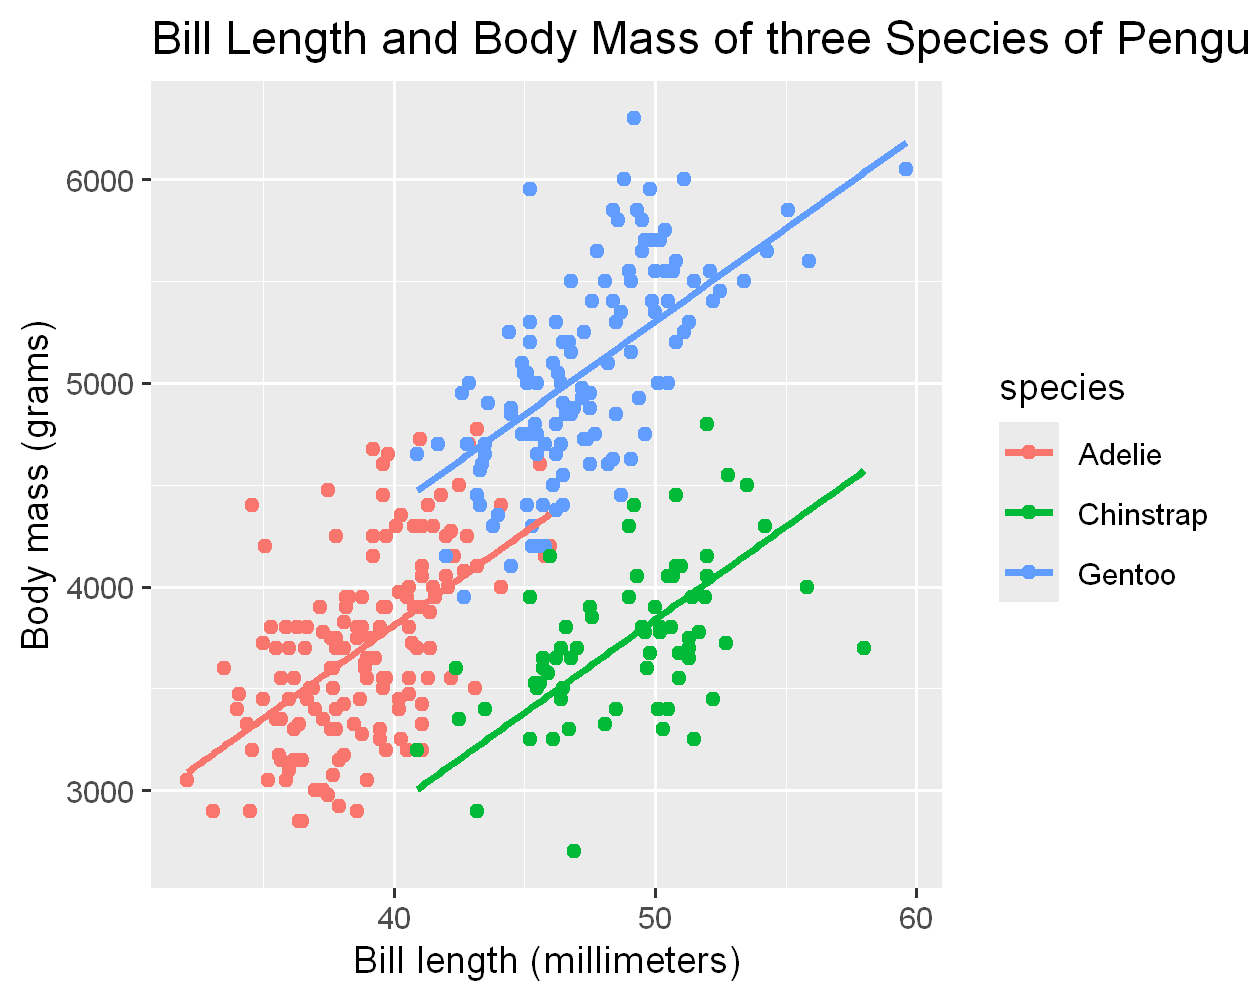

In [27]:
ggplot(data = pen, aes(y = body_mass_g, x = bill_length_mm, color = species)) + 
  geom_point() + 
  geom_parallel_slopes(se = FALSE) +
  labs(
    x = "Bill length (millimeters)", 
    y = "Body mass (grams)", 
    title = "Bill Length and Body Mass of three Species of Penguins"
) 

Let’s fit the parallel slopes model

In [ ]:
# Fit regression model:

mod <- linear_reg() |> set_engine('lm')

pen_parallel <- mod |> fit(body_mass_g ~ bill_length_mm + species, data = pen)

# Get regression table:
tidy(pen_parallel)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),153.73969,268.901233,0.5717329,5.678829e-01
bill_length_mm,91.43582,6.887119,13.2763517,1.158990e-32
speciesChinstrap,-885.81208,88.250154,-10.0375131,6.373927e-21
speciesGentoo,578.62916,75.362341,7.6779617,1.756354e-13


Let us once again inspect the conditions necessary for inference with
regression.

1.  Linearity of relationship between variables
2.  Independence of the residuals
3.  Normality of the residuals
4.  Equality of variance of the residuals

## Question 7

**Check for Linearity of relationship between variables **

Would you say that the relationship between `bill_length_mm` and
`body_mass_g` appears to be linear for each species?

> 📝 **Matt's Response**
> 
> Yes, the relationship appears to be linear regardless of species. Each one
> appears to be scattered around a roughly linear pattern.

**Check for Independence of the residuals**

This is the same as the first model that we looked it. The observations
in our data must be independent of one another. In this data, we can not
be sure this is case, for example, some of the penguins included may be
related (siblings, parents). We are not given enough information to
verify this condition has been met.

## Question 8

Check Normality of the residuals (and they should be centered at 0.)

### Question 8a: Add code for the histogram.

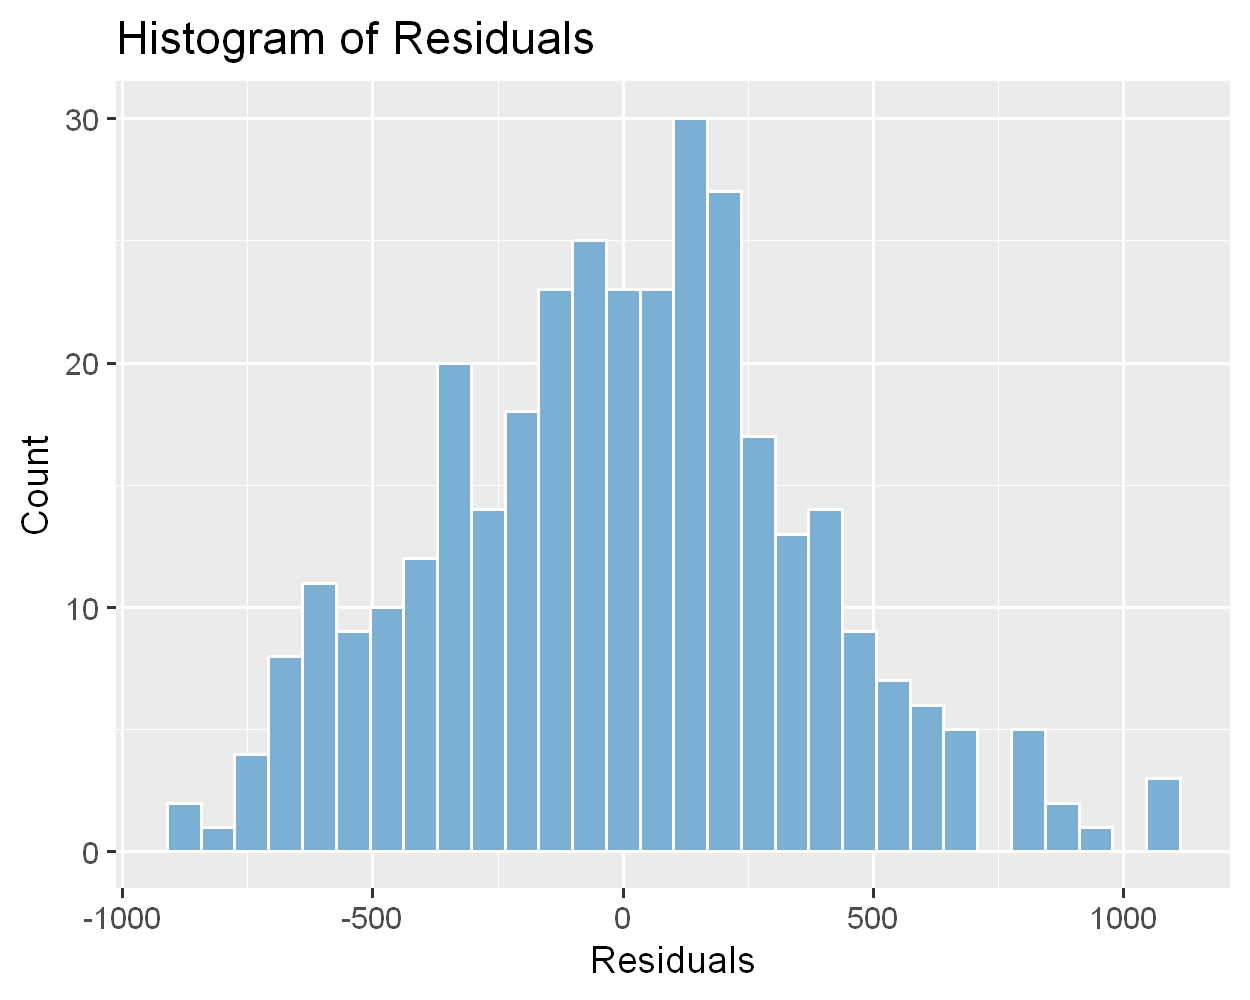

In [29]:
# Add code for the histogram:

regression_points_parallel <- augment(pen_parallel, new_data = pen)
ggplot(regression_points_parallel, aes(x = .resid)) +
  geom_histogram(bins = 30, fill = carolina_blue, color = "white") +
  labs(
    title = "Histogram of Residuals",
    x = "Residuals",
    y = "Count"
  )

### Question 8b: Does this model meet the Normality of Residuals condition?

> 📝 **Matt's Response**
> 
> A few notes, similar to the first check of residual normality:
>
> - The center is roughly at 0, perhaps slightly to the right of 0.
> - The shape is fairly symmetric.
> - The shape tapers off on the left and right, similar to how a bell curve is
>   shaped.
>
> With all of this in mind, it leads me to believe that the distribution of
> residuals follows a normal distribution. Because of this,
> **I'm confident that this model meets the normality of residuals condition.**

## Question 9

Check for Equality of variance of the residuals

To check this condition we can create a scatterplot that has our
explanatory variable, `flipper_length_mm`, on the x-axis and our
residuals on the y-axis.

### Question 9a: Add code to check equality of variance of residuals condition

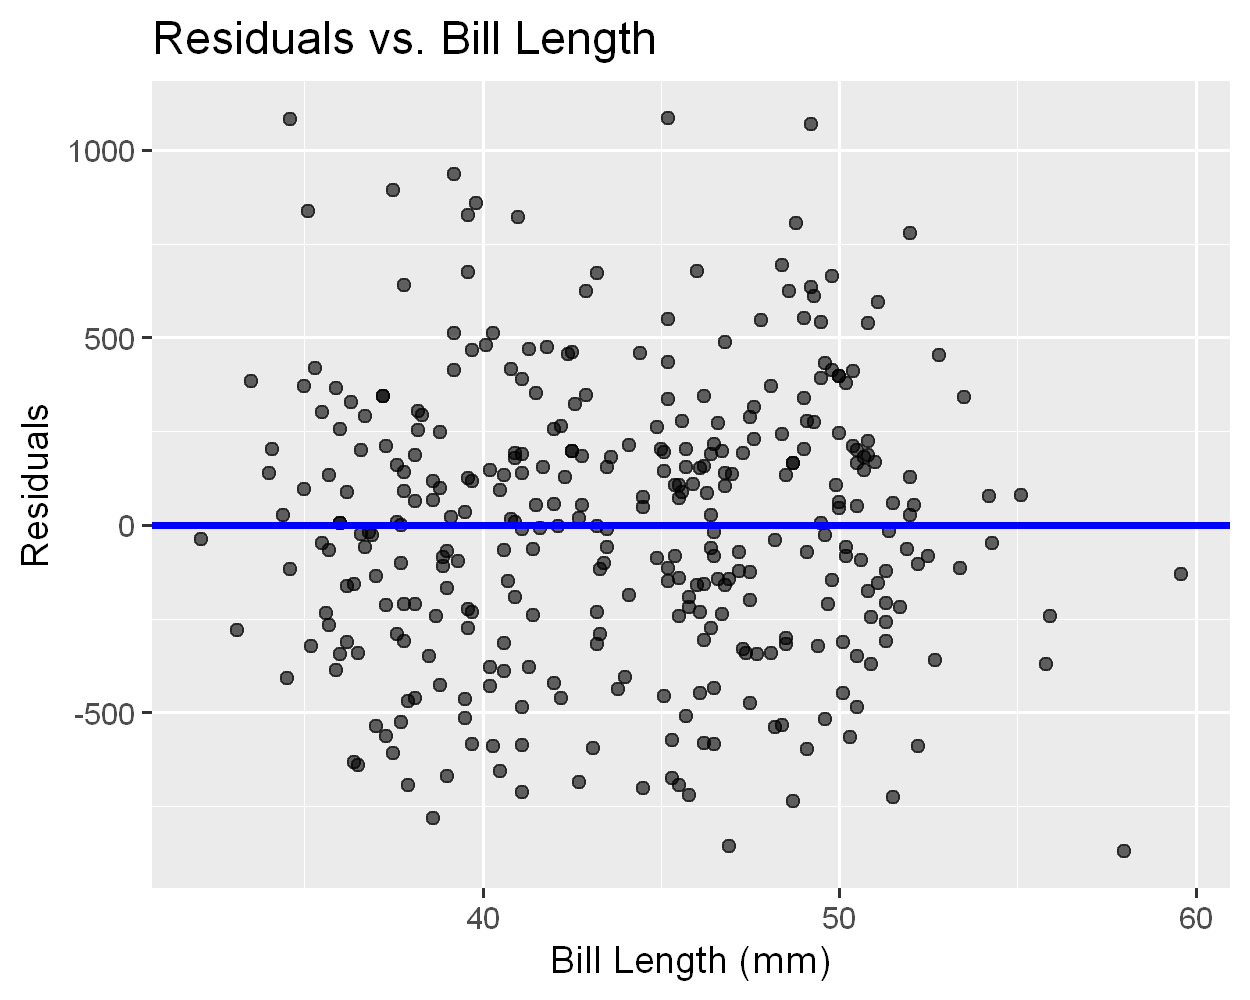

In [31]:
# Add code to check this condition:

ggplot(regression_points_parallel, aes(x = bill_length_mm, y = .resid)) +
  geom_point(alpha = 0.6) +
  geom_hline(yintercept = 0, color = "blue", linewidth = 1) +
  labs(
    title = "Residuals vs. Bill Length",
    x = "Bill Length (mm)",
    y = "Residuals"
  )

### Question 9b: Does this meet the equality of variance of the residuals condition?

> 📝 **Matt's Response**
> 
> Yes, the spread of residuals is fairly consistent across the range of bill
> length, and there isn't any pattern of variance in residual as bill length
> changes. Thus, **I'm inclined to accept that the model meets the condition**
> **of equality of variance of the residuals.**

## Question 10

Run the code below to find the confidence intervals for our model's coefficients.

In [33]:
boots <- bootstraps(pen, times = 1000, apparent = TRUE)
mod <- linear_reg() |> set_engine('lm')

boot_models <- boots |> mutate(
  model = map(
    splits,
    ~mod |> fit(body_mass_g ~ bill_length_mm + species, data = as_tibble(.x))
  ),
  coef_info = map(model, tidy)
)

boot_coefs = boot_models |> unnest(coef_info)
percentile_intervals = int_pctl(boot_models, coef_info)
percentile_intervals

term,.lower,.estimate,.upper,.alpha,.method
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
(Intercept),-392.37183,137.0428,622.9272,0.05,percentile
bill_length_mm,79.09393,91.8171,105.3819,0.05,percentile
speciesChinstrap,-1037.17896,-889.0853,-742.1024,0.05,percentile
speciesGentoo,434.21978,576.4994,723.5954,0.05,percentile


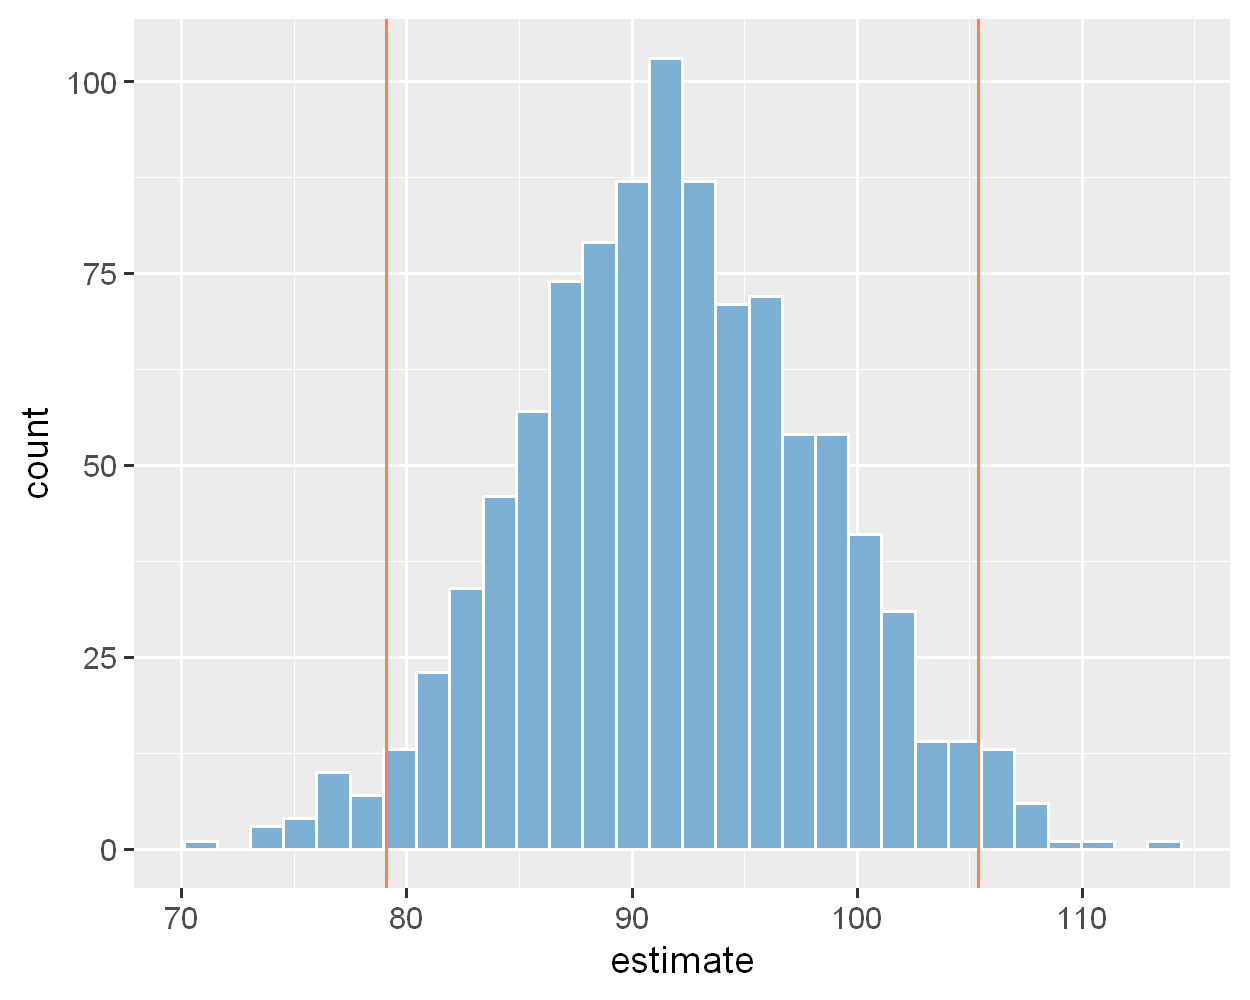

In [35]:
boot_coefs |> 
  filter(term == "bill_length_mm") |>
  ggplot(aes(x = estimate)) +
    geom_histogram(bins = 30, fill = carolina_blue, color = "white") +
    geom_vline(
        color = "coral",
        xintercept = percentile_intervals |>
          filter(term == "bill_length_mm") |>
          pull(.lower)
    ) +
    geom_vline(
        color = "coral",
        xintercept = percentile_intervals |>
          filter(term == "bill_length_mm") |>
          pull(.upper)
    )

What can we conclude about the relationship between bill length and body
mass?

> 📝 **Matt's Response**
> 
> Here, we calculated a 95% confidence interval placing $\beta_1$ in the range
> $(79.09, 105.38)$. This implies that we are 95% confident that, for every
> species, an increase of 1mm in bill length is associated with a corresponding
> increase in body mass between 79.09 - 105.38 grams. 
>
> While we didn't explicitly state it, we were testing against a null
> hypothesis that there is no relationship between bill length and body mass;
> i.e., $\beta_1 = 0$. Because $0$ is not included in our confidence interval,
> we can reject this hypothesis in favor of the alternative hypothesis that
> there is a relationship between flipper length and body mass, even when we
> consider differences between species.